# Capstone Project: Food Venues Data Analysis of Knoxville

## A. Introduction

### A.1 Business Problem

**Knoxville** is the **3rd largest city** in Tennessee, second only to Nashville and Memphis. It is also home to the University of Tennessee, which also drives many businesses to move into the area. Food Venue Data Analysis of the city would be of particular interest to someone who is looking to open a food restaurant in the area. If someone would like to open an Asian restaurant, or a Pizza place etc utilizing the data from FourSquare and Unsupervised learning clusters would help them discover which neighborhoods would be better options for this placement. Perhaps there are neighborhoods which already have too many pizza places, and some that have so few that they are very rare. This information will allow the business user to see where it is better to spend their resources.

### A.2 Data

The first data set that we would need is the list of Neighborhoods in Knoxville, TN. Next, we will need to get the latitude and longitude locations for each of the neighborhoods. We can get location data from geolocator.geocode() in **python**. We will create a visual map, just to make sure that the data is valid. Next, we are going to start using **Foursquare API** to look for the top 100 venues in a 750 meter radius of each neighborhood. These calls will be specific for the category of Food which has the categoryId of **4d4b7105d754a06374d81259**. This Id captures all categories of restaurants and it would be best for our use.

Once we have the data for each neighborhood, and their top food venues by category we are going to put this data through **k-means unsupervised learning** in order to create clusters. These clusters will be visualized using **Folium**. Post-visualization of these clusters, we will study what are the main differences between the clusters, and if we can discover a pattern which allows us to help answer our initial business problem.


## B. Methodology 

### B.1 Gathering and Pre-processing Data:
Importing csv file of the names of Neighborhoods in Knoxville, TN. Information collected from: https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Knoxville,_Tennessee

In [ ]:
import pandas as pd

In [540]:
dftn = pd.read_csv('Neighborhood.csv')

In [541]:
dftn.head()

,Neighborhood,City,Latitude,Longitude
0,Bearden,Knoxville,NaN,NaN
1,Cedar Bluff,Knoxville,NaN,NaN
2,Chilhowee Park,Knoxville,NaN,NaN
3,Colonial Village,Knoxville,NaN,NaN
4,Downtown Knoxville,Knoxville,NaN,NaN


In [542]:
dftn.shape

(28, 4)

In [543]:
dftn['Neighborhood'][27] 

'West Knoxville'

In [544]:
address = dftn['Neighborhood'][27] + ', ' + 'Knoxville'
geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

35.9700577 -83.955371


In [545]:
dftn['Latitude'][1]

nan

In [546]:
dftn.head()

,Neighborhood,City,Latitude,Longitude
0,Bearden,Knoxville,NaN,NaN
1,Cedar Bluff,Knoxville,NaN,NaN
2,Chilhowee Park,Knoxville,NaN,NaN
3,Colonial Village,Knoxville,NaN,NaN
4,Downtown Knoxville,Knoxville,NaN,NaN


### B.2 Add Latitude/Longitude Co-ordinates for each Neighborhood. 

Using Forloop and geolocator to fill the dataframe.

In [547]:
for i in range(28):  
    address = dftn['Neighborhood'][i] + ', ' + 'Knoxville'
    geolocator = Nominatim(user_agent="tor_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    dftn['Latitude'][i] = latitude
    dftn['Longitude'][i] = longitude

<ipython-input-547-3583e0b6b7ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftn['Latitude'][i] = latitude
<ipython-input-547-3583e0b6b7ff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftn['Longitude'][i] = longitude


In [611]:
dftn.head()

,Neighborhood,City,Latitude,Longitude
0,Bearden,Knoxville,35.932859,-84.002686
1,Cedar Bluff,Knoxville,35.924885,-84.105837
2,Chilhowee Park,Knoxville,35.998107,-83.883183
3,Colonial Village,Knoxville,35.919528,-83.882681
4,Downtown Knoxville,Knoxville,35.962600,-83.874223


In [549]:
dftn['Latitude'][5] = 35.9942
dftn['Longitude'][5] = -83.8872

<ipython-input-549-5429efca18a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftn['Latitude'][5] = 35.9942
<ipython-input-549-5429efca18a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftn['Longitude'][5] = -83.8872


In [550]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [551]:
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim

In [552]:
#!conda install -c conda-forge geopy --yes

In [553]:
import folium

In [554]:
#conda install - c- conda-forge folium

In [555]:
#conda install -c conda-forge/label/gcc7 folium

### B.3 Plotting Neighborhoots in Knoxville, TN using Folium 

We want to plot the dataframe in order to make sure that our information is correct. Secondly, we can also visualize the Neighborhoods and see how spread they are.

In [556]:
address = 'Knoxville, TN'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Co-ordinates from Knoxville are {}, {}.'.format(latitude, longitude))

Co-ordinates from Knoxville are 35.9603948, -83.9210261.


In [557]:
# Create TN Map using the co-ordinates from line 10
map_tennessee = folium.Map(location=[latitude, longitude], zoom_start = 11)

# add markets to map
for lat, lng, city in zip(dftn['Latitude'], dftn['Longitude'], dftn['Neighborhood']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_tennessee) 

# Create Map
map_tennessee

### B.4 Gathering Data from Foursquare for each Neighborhood in Knoxville, TN

We use our credentials to create an access to FourSqaure, and then from there we will be using our collected Latitude and Longitude co-ordinates for each Neighborhood to list 100 venues in a 750 meter radius.

In [558]:
CLIENT_ID = 'UNT54NGH1I4OR4QJMDCXJC5OZRBTVAKUXEER23XAHLE0SV0P'
CLIENT_SECRET = 'H2DWRNMUW4A0P3CGD2HJTPPV0TF3KFVPDRWWHFBFLTQVEJNF'
VERSION = '20180605'
#VERSION = '20180323'

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET ' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: UNT54NGH1I4OR4QJMDCXJC5OZRBTVAKUXEER23XAHLE0SV0P
CLIENT_SECRET H2DWRNMUW4A0P3CGD2HJTPPV0TF3KFVPDRWWHFBFLTQVEJNF


In [559]:
dftn.loc[0]

Neighborhood      Bearden
City            Knoxville
Latitude          35.9329
Longitude        -84.0027
Name: 0, dtype: object

In [560]:
# Get city latitude and longitude values.

neighborhood_latitude = dftn.loc[0, 'Latitude']
neighborhood_longitude = dftn.loc[0, 'Longitude']
neighborhood_name = dftn.loc[0, 'Neighborhood']

print('Latitude and Longitude values of {} are {}, {}.'.format(neighborhood_name,
                                                    neighborhood_latitude,
                                                    neighborhood_longitude))

Latitude and Longitude values of Bearden are 35.9328592, -84.0026865.


In [561]:
# Create the GET request URL
LIMIT = 100
radius = 750 #meters
categoryId = '4d4b7105d754a06374d81259' # Food

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    VERSION, 
    radius, 
    LIMIT,
    categoryId)
url

'https://api.foursquare.com/v2/venues/explore?client_id=UNT54NGH1I4OR4QJMDCXJC5OZRBTVAKUXEER23XAHLE0SV0P&client_secret=H2DWRNMUW4A0P3CGD2HJTPPV0TF3KFVPDRWWHFBFLTQVEJNF&ll=35.9328592,-84.0026865&v=20180605&radius=750&limit=100&categoryId=4d4b7105d754a06374d81259'

In [562]:
import requests
# Examine results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '608d3ad7a74b43585d9b394e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Knoxville',
  'headerFullLocation': 'Knoxville',
  'headerLocationGranularity': 'city',
  'query': 'food',
  'totalResults': 25,
  'suggestedBounds': {'ne': {'lat': 35.939609206750006,
    'lng': -83.99436568949747},
   'sw': {'lat': 35.92610919325, 'lng': -84.01100731050252}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b71c969f964a5205e5c2de3',
       'name': 'Sitar Indian Cuisine',
       'location': {'address': '6004 Kingston Pike',
        'crossStreet': 'at S Northshore Dr',
        'lat': 35.93288980335167,
        'lng

In [563]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [564]:
#from pandas.io.json import json_normalize
from pandas import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Sitar Indian Cuisine,Indian Restaurant,35.932890,-84.001477
1,Bistro by the Tracks,American Restaurant,35.934955,-84.003747
2,Surin of Thailand,Thai Restaurant,35.932803,-84.005040
3,Aubrey's,American Restaurant,35.937712,-84.005495
4,Wasabi Japanese Steakhouse & Sushi Bar,Japanese Restaurant,35.933088,-84.008790


In [565]:
print('{} venues were returned by Foursqaure.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursqaure.


In [566]:
nearby_venues.head()

,name,categories,lat,lng
0,Sitar Indian Cuisine,Indian Restaurant,35.932890,-84.001477
1,Bistro by the Tracks,American Restaurant,35.934955,-84.003747
2,Surin of Thailand,Thai Restaurant,35.932803,-84.005040
3,Aubrey's,American Restaurant,35.937712,-84.005495
4,Wasabi Japanese Steakhouse & Sushi Bar,Japanese Restaurant,35.933088,-84.008790


### B.5 Iterating through the entire list of Neighborhood names, and using the categoryId for Food

Using this categoryId will allow us to get all of the different types of food in Knoxville, TN and that which are contained in the FourSqaure database.

In [567]:
def getNearbyVenues(names, latitudes, longitudes, radius=750, categoryId = '4d4b7105d754a06374d81259'):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [568]:
TN_venues = getNearbyVenues(names=dftn['Neighborhood'],
                                      latitudes=dftn['Latitude'],
                                      longitudes=dftn['Longitude']
                                      )
print(TN_venues.shape)
TN_venues.head()

Bearden
Cedar Bluff
Chilhowee Park
Colonial Village
Downtown Knoxville
East Knoxville
Forest Heights
Fort Sanders
Fountain City
Fourth and Gill
Island Home Park
Lake Forest
Lindbergh Forest
Lonsdale
Mechanicsville
North Knoxville
Norwood
Oakwood-Lincoln Park
Old City
Old North Knoxville
Parkridge
Rocky Hill
Sequoyah Hills
South Knoxville
University of Tennessee
Turkey Creek
West Hills
West Knoxville
(331, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bearden,35.932859,-84.002686,Sitar Indian Cuisine,35.932890,-84.001477,Indian Restaurant
1,Bearden,35.932859,-84.002686,Bistro by the Tracks,35.934955,-84.003747,American Restaurant
2,Bearden,35.932859,-84.002686,Surin of Thailand,35.932803,-84.005040,Thai Restaurant
3,Bearden,35.932859,-84.002686,Aubrey's,35.937712,-84.005495,American Restaurant
4,Bearden,35.932859,-84.002686,Wasabi Japanese Steakhouse & Sushi Bar,35.933088,-84.008790,Japanese Restaurant


## C. Results

### C.1 Analysis of how many different venues are there in each Neighborhood

In [569]:
# How many venues were returned for each county
TN_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bearden,25,25,25,25,25,25
Cedar Bluff,2,2,2,2,2,2
Chilhowee Park,11,11,11,11,11,11
Colonial Village,2,2,2,2,2,2
Downtown Knoxville,2,2,2,2,2,2
East Knoxville,12,12,12,12,12,12
Fort Sanders,48,48,48,48,48,48
Fountain City,11,11,11,11,11,11
Fourth and Gill,7,7,7,7,7,7


In [570]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

In [571]:
TN_venues_df = TN_venues.groupby('Neighborhood').count()
TN_venues_df2 = TN_venues_df.reset_index()
TN_venues_df2.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bearden,25,25,25,25,25,25
1,Cedar Bluff,2,2,2,2,2,2
2,Chilhowee Park,11,11,11,11,11,11
3,Colonial Village,2,2,2,2,2,2
4,Downtown Knoxville,2,2,2,2,2,2


### C.2 Plot of how many different venues exist in each Neighborhood

Fort Sanders has the most number of venues in Knoxville, followed closely by the Old City and University of Tennessee.

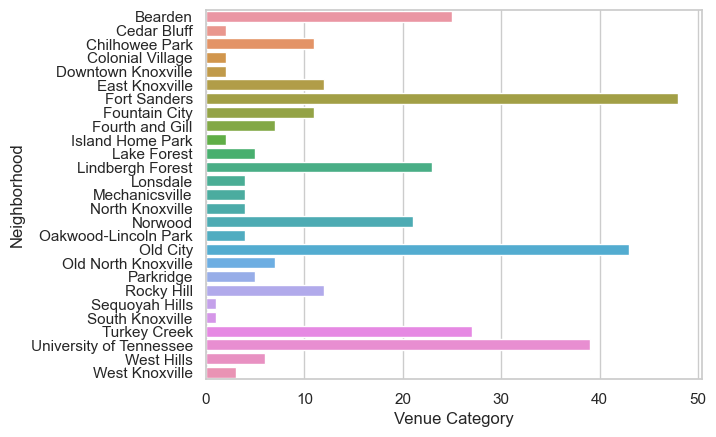

In [572]:
sns.set_theme(style='whitegrid')
venue_count = TN_venues_df2
ax = sns.barplot(y = "Neighborhood", x ="Venue Category", data=venue_count)

### C.3 Analysis of what food categories exist in Knoxville

In [573]:
Pizza = TN_venues['Venue Category'].value_counts()
Pizza = Pizza.to_frame()
Pizza = Pizza.reset_index().rename(columns = {'index': 'Food Category'})
Pizza = Pizza.head(10)
Pizza

,Food Category,Venue Category
0,Fast Food Restaurant,39
1,Pizza Place,32
2,American Restaurant,30
3,Sandwich Place,29
4,Food,19
5,Mexican Restaurant,17
6,Chinese Restaurant,13
7,Deli / Bodega,12
8,Restaurant,12
9,Breakfast Spot,11


### C.4 Plot: Food Categories in Knoxville

When look a little deeper to see what are the most popular types of food in Knoxville, and it appears Fast Food Restaurant is at the top. The next top category is Pizza.

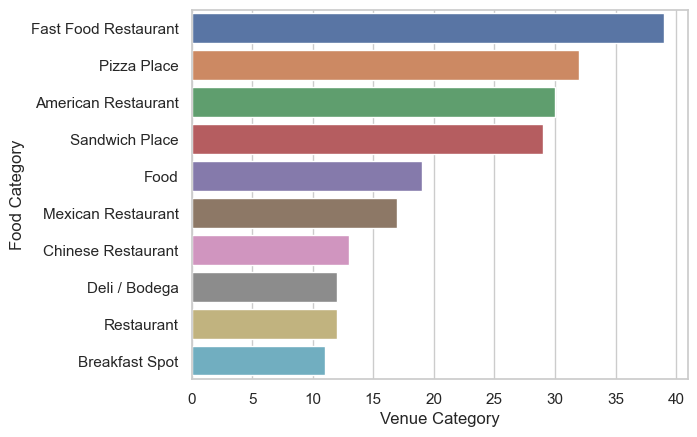

In [574]:
sns.set_theme(style='whitegrid')
venue_count = Pizza
ax = sns.barplot(x = "Venue Category", y ="Food Category", data=Pizza)

### C.5 Analysis of Pizza Places in Knoxville

In [612]:
Pizza_Place = TN_venues[TN_venues['Venue Category'] == 'Pizza Place']
Pizza_Place.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
19,Bearden,35.932859,-84.002686,Snappy Tomato Pizza,35.933990,-83.999573,Pizza Place
21,Bearden,35.932859,-84.002686,Rosati's,35.936238,-84.003548,Pizza Place
27,Chilhowee Park,35.998107,-83.883183,Pizza Palace,35.994964,-83.885873,Pizza Place
42,East Knoxville,35.994200,-83.887200,Pizza Palace,35.994964,-83.885873,Pizza Place
47,East Knoxville,35.994200,-83.887200,Little Caesars Pizza,35.990312,-83.890161,Pizza Place


### C.6 Map of all of the Pizza places in Knoxville

In [576]:
# Create TN Map using the co-ordinates from line 10
map_pizza = folium.Map(location=[latitude, longitude], zoom_start = 11)

# add markets to map
for lat, lng, city in zip(Pizza_Place['Venue Latitude'], Pizza_Place['Venue Longitude'], Pizza_Place['Venue']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_pizza) 

# Create Map
map_pizza

### C.7 Most common Pizza places 

In [603]:
Pizza_cat = Pizza_Place['Venue'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Pizza Place'})
Pizza_cat.head(7)

,Pizza Place,Venue
0,Domino's Pizza,7
1,Sbarro's at Rocky Top in the UC,2
2,Pizza Palace,2
3,Little Caesars Pizza,2
4,Mellow Mushroom,2
5,Stefanos Pizza,2
6,Papa John's Pizza,2


### C.8 Plot: Names of Most common Pizza places

Domino's franchise has the most locations in Knoville, TN out of all of the different Pizza locations.

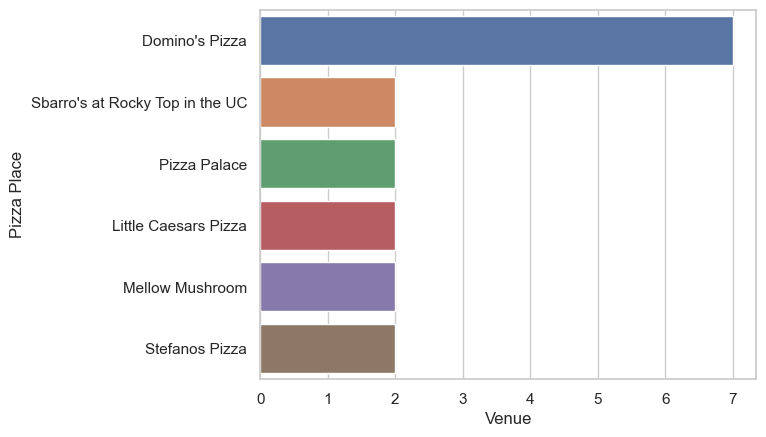

In [607]:
sns.set_theme(style='whitegrid')
#venue_count = Pizza_cat.head()
ax = sns.barplot(x = "Venue", y ="Pizza Place", data=Pizza_cat.head(6))

In [577]:
# How many unique categories can be curated from all the returned venues?

print('There are {} unique categories.'.format(len(TN_venues['Venue Category'].unique())))

There are 45 unique categories.


### C.9 Analysis of top 5 unique categories by Neighborhood 

In [578]:
# one hot encoding
Tn_onehot = pd.get_dummies(TN_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Tn_onehot['Neighborhood'] = TN_venues['Neighborhood'] 

# move neighborhood column to the first column
Tn_onehot = Tn_onehot.set_index('Neighborhood').reset_index()

Tn_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Breakfast Spot,Burger Joint,Burrito Place,Café,...,Snack Place,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Bearden,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bearden,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bearden,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Bearden,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bearden,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [579]:
#Find location of Neighborhood column
Tn_onehot.columns.get_loc("Neighborhood")

0

In [580]:
Tn_onehot.shape

(331, 46)

In [581]:
tn_grouped = Tn_onehot.groupby('Neighborhood').mean().reset_index()
tn_grouped

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Breakfast Spot,Burger Joint,Burrito Place,Café,...,Snack Place,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Bearden,0.080000,0.000000,0.080000,0.000000,0.040000,0.040000,0.040000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000
1,Cedar Bluff,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Chilhowee Park,0.181818,0.090909,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Colonial Village,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Downtown Knoxville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,East Knoxville,0.166667,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,...,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Fort Sanders,0.062500,0.020833,0.000000,0.020833,0.041667,0.041667,0.041667,0.000000,0.000000,...,0.000000,0.020833,0.000000,0.000000,0.000000,0.020833,0.020833,0.020833,0.000000,0.000000
7,Fountain City,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Fourth and Gill,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Island Home Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [582]:
tn_grouped.shape

(27, 46)

In [583]:
num_top_venues = 5

for hood in tn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = tn_grouped[tn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bearden----
                  venue  freq
0   American Restaurant  0.08
1  Fast Food Restaurant  0.08
2             BBQ Joint  0.08
3       Thai Restaurant  0.08
4           Pizza Place  0.08


----Cedar Bluff----
                 venue  freq
0                 Café   0.5
1                 Food   0.5
2  American Restaurant   0.0
3   Seafood Restaurant   0.0
4   Mexican Restaurant   0.0


----Chilhowee Park----
                             venue  freq
0              American Restaurant  0.18
1                             Food  0.18
2  Southern / Soul Food Restaurant  0.18
3                        BBQ Joint  0.09
4                 Asian Restaurant  0.09


----Colonial Village----
                  venue  freq
0                  Café   0.5
1  Fast Food Restaurant   0.5
2   American Restaurant   0.0
3    Seafood Restaurant   0.0
4    Mexican Restaurant   0.0


----Downtown Knoxville----
                      venue  freq
0                Restaurant   0.5
1        Chinese Restaurant   0.5

In [584]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [585]:
import numpy as np
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tn_grouped['Neighborhood']

for ind in np.arange(tn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bearden,American Restaurant,BBQ Joint,Thai Restaurant,Fast Food Restaurant,Food
1,Cedar Bluff,Food,Café,Wings Joint,Donut Shop,Gastropub
2,Chilhowee Park,American Restaurant,Southern / Soul Food Restaurant,Food,Pizza Place,Asian Restaurant
3,Colonial Village,Fast Food Restaurant,Café,Wings Joint,Donut Shop,Gastropub
4,Downtown Knoxville,Chinese Restaurant,Restaurant,Wings Joint,Donut Shop,Gastropub


### C.10 Creating Neighborhood Clusters using K-means Unsupervised Learning

In [586]:
# set number of clusters
kclusters = 5

tn_grouped_clustering = tn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int32)

In [587]:
# remove existing labels and add clustering labels
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop(['Cluster Labels'], axis = 1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tn_merged = dftn

# merge tn_grouped with tn_data to add latitude/longitude for each neighborhood
tn_merged = tn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

tn_merged.head() # check the last columns!

,Neighborhood,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bearden,Knoxville,35.932859,-84.002686,1.0,American Restaurant,BBQ Joint,Thai Restaurant,Fast Food Restaurant,Food
1,Cedar Bluff,Knoxville,35.924885,-84.105837,2.0,Food,Café,Wings Joint,Donut Shop,Gastropub
2,Chilhowee Park,Knoxville,35.998107,-83.883183,1.0,American Restaurant,Southern / Soul Food Restaurant,Food,Pizza Place,Asian Restaurant
3,Colonial Village,Knoxville,35.919528,-83.882681,1.0,Fast Food Restaurant,Café,Wings Joint,Donut Shop,Gastropub
4,Downtown Knoxville,Knoxville,35.962600,-83.874223,0.0,Chinese Restaurant,Restaurant,Wings Joint,Donut Shop,Gastropub


In [588]:
tn_merged = tn_merged.dropna()

In [613]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tn_merged['Latitude'], tn_merged['Longitude'], tn_merged['Neighborhood'], tn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### C.11 Neighborhood listing by unique cluster

In [590]:
tn_merged[tn_merged['Cluster Labels'] == 0.0]

,Neighborhood,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Downtown Knoxville,Knoxville,35.962600,-83.874223,0.0,Chinese Restaurant,Restaurant,Wings Joint,Donut Shop,Gastropub
10,Island Home Park,Knoxville,35.961106,-83.884009,0.0,Chinese Restaurant,Restaurant,Wings Joint,Donut Shop,Gastropub


In [591]:
tn_merged[tn_merged['Cluster Labels'] == 1.0]

,Neighborhood,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bearden,Knoxville,35.932859,-84.002686,1.0,American Restaurant,BBQ Joint,Thai Restaurant,Fast Food Restaurant,Food
2,Chilhowee Park,Knoxville,35.998107,-83.883183,1.0,American Restaurant,Southern / Soul Food Restaurant,Food,Pizza Place,Asian Restaurant
3,Colonial Village,Knoxville,35.919528,-83.882681,1.0,Fast Food Restaurant,Café,Wings Joint,Donut Shop,Gastropub
5,East Knoxville,Knoxville,35.994200,-83.887200,1.0,American Restaurant,Pizza Place,Southern / Soul Food Restaurant,Food Truck,Food
7,Fort Sanders,Knoxville,35.959170,-83.934895,1.0,Pizza Place,Sandwich Place,Deli / Bodega,Mexican Restaurant,American Restaurant
8,Fountain City,Knoxville,36.032026,-83.937408,1.0,Fast Food Restaurant,Sandwich Place,American Restaurant,Pizza Place,Breakfast Spot
9,Fourth and Gill,Knoxville,35.985916,-83.921851,1.0,Fast Food Restaurant,Deli / Bodega,Mexican Restaurant,Chinese Restaurant,Sandwich Place
11,Lake Forest,Knoxville,35.926751,-83.867681,1.0,Fast Food Restaurant,Mexican Restaurant,Food,Pizza Place,Wings Joint
12,Lindbergh Forest,Knoxville,36.028778,-83.875321,1.0,Fast Food Restaurant,American Restaurant,Pizza Place,Fried Chicken Joint,Asian Restaurant
15,North Knoxville,Knoxville,36.002027,-83.912407,1.0,American Restaurant,Restaurant,Mexican Restaurant,Sandwich Place,Fried Chicken Joint


In [592]:
tn_merged[tn_merged['Cluster Labels'] == 2.0]

,Neighborhood,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Cedar Bluff,Knoxville,35.924885,-84.105837,2.0,Food,Café,Wings Joint,Donut Shop,Gastropub
14,Mechanicsville,Knoxville,35.969145,-83.931845,2.0,Food,Sandwich Place,BBQ Joint,Deli / Bodega,Gastropub
20,Parkridge,Knoxville,35.981203,-83.906144,2.0,Food,BBQ Joint,Southern / Soul Food Restaurant,Deli / Bodega,Wings Joint
27,West Knoxville,Knoxville,35.970058,-83.955371,2.0,BBQ Joint,Food,Snack Place,Wings Joint,Donut Shop


In [593]:
tn_merged[tn_merged['Cluster Labels'] == 3.0]

,Neighborhood,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
13,Lonsdale,Knoxville,35.985638,-83.957130,3.0,American Restaurant,Food,Indian Restaurant,Gastropub,Fried Chicken Joint
23,South Knoxville,Knoxville,35.943139,-83.898794,3.0,Food,Wings Joint,Indian Restaurant,Gastropub,Fried Chicken Joint


In [594]:
tn_merged[tn_merged['Cluster Labels'] == 4.0]

,Neighborhood,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
22,Sequoyah Hills,Knoxville,35.940194,-83.969397,4.0,Bakery,Wings Joint,Donut Shop,Gastropub,Fried Chicken Joint


## D. Discussion 

Knoxville, TN has a very diverse group of neighborhoods, some areas are heavily populated with food venues (e.g. Fort Sanders, Old City, University of Tennessee) whereas others could use more food places within a 750 meter radius of the neighborhood (e.g. Colonial Village and South Knoxville). As we studied the distribution of which categories of food are in Knoxville, then they appear to have a little bit of everything i.e. Chinese Restaurants, Mexican Restaurants, Indian Restaurants, however top of the list are Fast Food Restaurants. The second most popular food category in Knoxville are Pizza Places. Upon further examination of the data for Pizza Places, we discover that although they are spread all over Knoxville, the most common Pizza Place in Knoxville is Domino’s Pizza with the most franchises placed closest to the neighborhood locations.

As we next look at the k-means cluster data, we notice that Cluster 3.0 is unique due to having Indian Restaurants. Whereas, Chinese Restaurants appear as the Most Common Venue is Cluster 0.0, which Includes Downtown Knoxville and Island Park Home. As we focus on Pizza, we notice that almost all of the Pizza places in Knoxville are concentrated in Cluster 1.0. 

For a business that is looking to open a Pizza place in knoxville there are going to be a few questions that we will have to answer before doing so, and other facts to keep in mind:

Fort Sanders has the most food venues in Knoxville, and the most popular venue is Pizza. They should gather data of population density by neighborhood, and that would allow them to see if it even makes sense to open another Pizza place in this area. It might be better for them to select another location from Cluster 1.0, however where Pizza is perhaps the least common venue, that may prove to be an excellent location as long as we also have population density.

Another thing to keep in mind would be that clusters other than 1.0, seem to have no Pizza places as their most common place. This perhaps may be a prime location to open a place up, however this would require more analysis as they would still have to wonder, ‘How come no one else decided to place more Pizza options there?’ 


## E. Conclusion 

Knoxville is a growing city, and the diversity of food, number of venues proves this. In order for someone to open a Pizza restaurant, they would have to do further analysis keeping population density in mind to make a better decision. K-means clusters show an excellent differentiation of where all of the pizza places in the city have been concentrated, this would be quite powerful for someone to study this deeper, in order to make a location selection for their restaurant.